# 랜덤 포레스트
- 결정 트리의 주요 단점인 훈련 데이터에 과대적합되는 경향을 회피할 수 있는 방법으로 조금씩 다른 여러 결정 트리의 묶음
- 지정된 트리들은 독립적으로 만들어져야 하며, 트리를 만들기 위해서는 데이터의 부트스트랩 샘플을 생성해야 함
  - 부트스트랩 샘플은 n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출하는 것으로 한 샘플이 여러 번 중복 추출될 수 있음
  - (e.g.) ['a', 'b', 'c', 'd']에서 부트스트랩 샘플은 ['b', 'd', 'd', 'c']도 될 수 있고 ['d', 'a', 'd', 'a']가 될 수도 있음

In [29]:
# 라이브러리 사용
import mglearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [30]:
# two_moon 데이터셋을 가지고 트리 5개로 구성된 랜덤 포레스트 모델을 생성해보겠습니다.
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

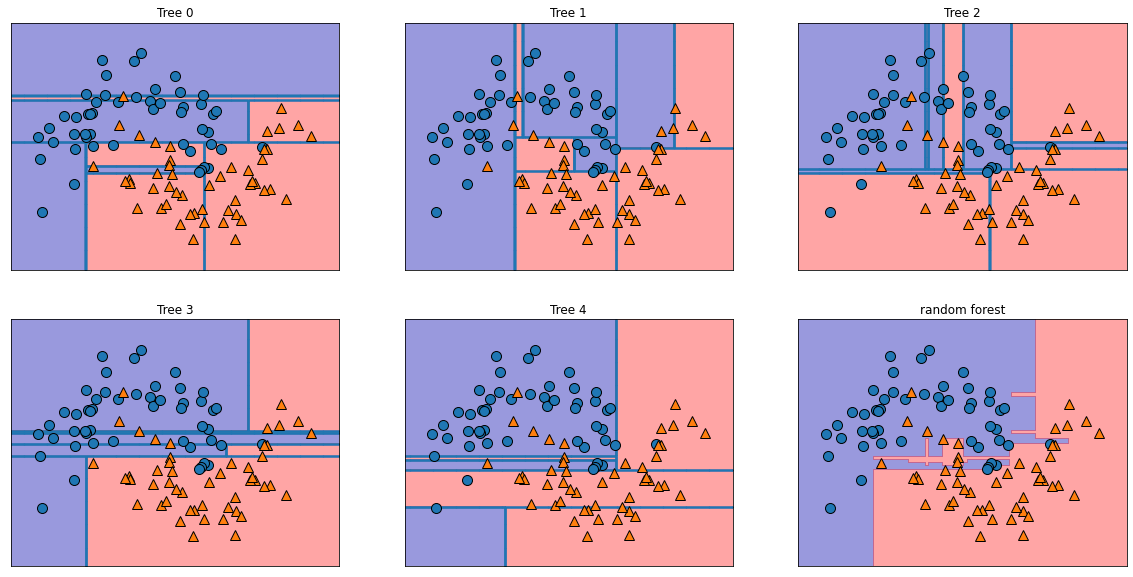

In [32]:
# 각 트리에서 학습된 결정 경계와 이를 취합해 결정 경계를 시각화해보겠습니다.
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [33]:
# 성능 확인
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


- 매개변수 튜닝 없이 선형 모델이나 단일 결정 트리보다 높은 정확도를 보임
- 특성 중요도 확인 가능

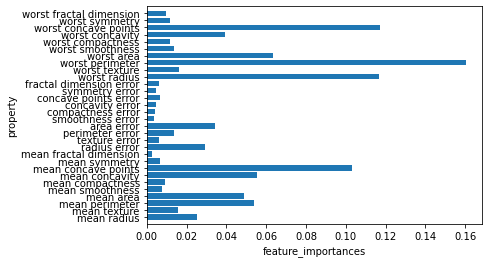

In [34]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature_importances")
    plt.ylabel("property")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)